<h1 style="font-size:40px;padding:0px;text-align:left;">Math Gender Gap Project</h1>
<h4 style="padding:0px;text-align:left;white-space: pre;">AUTHOR: Salman Khan                                                                               Date: 10/21/2024</h4>


Consider the following research questions. 
* What explains the observed lower average math scores of females relative to males?
* Are females less math oriented than males?

If you were trying to answer the latter question, ideally you'd like to run a randomized controlled experiment in which, hypothetically, gender could be randomly assigned to subjects. Then, one would simply compare average scores of the two groups. Since such an experiment is not feasible, we need to resort to observational data such as PISA. However, it is easy to find several confounding factors that explain math score, and do systematically covary with gender. Such confounders need be controlled for in linear regression models. But problems do not end there.

Consider institutions of countries or culture. Some countries have better education systems than others, and some countries are culturally more gender-equal than others. As Nollenberger et al.(2016) state "<font color = "red">it is possible that greater gender equality leads to a reduction in the math gender gap, ... in countries where girls perform relatively better at math, women might also be more prepared, access better jobs, earn higher wages, and be more easily promoted and politically empowered, leading to greater gender equality</font>". 

This is the so-called <font color = "red">reverse causality</font> problem. The authors' strategy to overcome this problem is to focus on the second-generation immigrants (students) who have lived in a host country since birth, and are exposed to the same host-country institutions. These students will be exposed to the cultural beliefs of their parents' ancestry country. But note that the math test scores of these students are unlikely to affect culture or institutions of of their parents' ancestry country. Hence, the aforementioned reverse causality problem is unlikely to occur.

Nollenberger et al.(2016) estimate different versions of the following specification:

\begin{align*}
PV5MATH_{ijkt}&=\alpha_1FEMALE_i+\alpha_2(FEMALE_i\times GGI_j)+\boldsymbol{x}_{ijkt}^{'}\boldsymbol{\beta}_1+(FEMALE_i\times\boldsymbol{x}_{ijkt}^{'})\boldsymbol{\beta}_2+\lambda_j+\lambda_k+\lambda_t+\delta(FEMALE_i\times\lambda_k)+\varepsilon_{ijkt}
\end{align*}
where 
* $PV5MATH_{ijkt}$ denotes the (plausible) math test score of student $i$ from cohort $t$ who lives in country $k$, and is of ancestry $j$, 
* $FEMALE_i$ is an indicator equal to one if student $i$ is a girl and zero otherwise,
* $GGI_j$ is the gender equality index from student $i$'s country of ancestry $j$,
* $\boldsymbol{x}_{ijkt}$ denotes a set of control variables which will vary depending on the specification considered,
* $\lambda_j$ denotes the ancestry country dummy (to control for time invariant country of ancestry characteristics),
* $\lambda_k$ denotes the host country dummy (to control for time invariant host country characteristics),
* $\lambda_t$ denotes the PISA cohort dummy (to control for student invariant cohort characteristics).
* Host country dummy is interacted with the female dummy to account for host country educational gender gaps.

The coefficient of interest is $\alpha_2$, which captures the role of culture on gender equality in explaining gender differences in the math test scores of second-generation immigrant girls relative to boys.

Below you will find the description of the main variables used in the regressions in Table 1.

| variable | description|
|:-----------|:------------|
|year | cohort |
|pv5math |(plausible) math test score 5 |
|ggi | gender gap index |
|female | indicator: $1$ if female, $0$ otherwise |
|age | age in years and month |
|diffgrade | indicator: $1$ if the current individual's grade is different from the modal grade at the children age in the host country, $0$ otherwise| 
|misced | mother's highest level of education (categorical $0$ to $6$)|
|fisced | father's highest level of education (categorical $0$ to $6$)| 
|momwork | indicator: $1$ if mother works, $0$ otherwise|
|dadwork | indicator: $1$ if father works, $0$ otherwise| 
|lgdppc | log per capita GDP of the country|
|homepos | index of cultural possessions (positive values imply higher)|
|pcgirls | PISA index of the proportion of girls enrolled in each school|
|private | indicator: $1$ if school is private, $0$ otherwise|
|metropolis | indicator: $1$ if school is a metropolitan area, $0$ otherwise|
|background | parents' (both) country of birth|
|country | host country|
|stweight | sample weights to be used in regressions|

1. (40 pts) Replicate Figure 1 on page 258.
   * You first need to calculate math gender gap values by country of ancestry (i.e., by $background$).
   * To this end, you need to regress $PV5MATH$ on $FEMALE$ dummy by $background$ country, and save the slope estimates for the female dummy.
   * Then, you can generate a scatter plot where $x$-axis is the $GGI$ of the ancestry country, and $y$-axis is the `math gender gap` estimates of the ancestry country from the regressions.


2. (60 pts) Replicate Table 1 on page 260 (need not be exact).
    * Estimate six different specifications.
    * Pay attention to the set regressors in each specification.
    * Note that in all specifications the dependent variables is $PV5MATH$.
    * You need to include cohort fixed effects ($\lambda_t$), ancestry country fixed effects ($\lambda_j$), host country fixed effects ($\lambda_k$), and the interaction of female dummy with host country fixed effects ($female_i\times\lambda_k$) in all specifications <font color = "red">except the third</font>, where there are no ancestry country fixed effects.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from stargazer.stargazer import Stargazer
from IPython.core.display import display, HTML

C:\Users\Salman Khan\AppData\Local\Temp\ipykernel_11108\2077509611.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [6]:
df = pd.read_csv(r'C:\Users\Salman Khan\Downloads\MIDTERM\Final_sample.csv')
df.head()

,year,background,cnt,country,female,age,diffgrade,fisced,misced,momwork,...,gdppc,hdi,lgdppc,obs,norigin,stratum2003,hostregion,stratum2006,stratum2009,stratum2012
0,2012,Bolivia,ARG,Argentina,0,15.75,0,6.0,6.0,0.0,...,3791.675,0.659,8.240563,131,4,NaN,3202,NaN,NaN,ARG0102
1,2009,Bolivia,ARG,Argentina,1,15.33,1,5.0,0.0,NaN,...,3791.675,0.659,8.240563,131,4,NaN,3203,NaN,3203.0,NaN
2,2009,Bolivia,ARG,Argentina,0,15.92,1,NaN,NaN,1.0,...,3791.675,0.659,8.240563,131,4,NaN,3201,NaN,3201.0,NaN
3,2012,Bolivia,ARG,Argentina,1,16.00,0,2.0,4.0,1.0,...,3791.675,0.659,8.240563,131,4,NaN,3202,NaN,NaN,ARG0102
4,2009,Bolivia,ARG,Argentina,1,16.17,0,5.0,5.0,0.0,...,3791.675,0.659,8.240563,131,4,NaN,3201,NaN,3201.0,NaN


In [7]:
results = []
for country in df['background'].unique():
    country_data = df[df['background'] == country]
    if len(country_data) > 1:
        model = smf.ols('pv5math ~ female', data=country_data).fit()
        results.append({'background': country, 'female_dummy_coef': model.params['female']})
slope_estimates = pd.DataFrame(results, columns=['background', 'female_dummy_coef'])

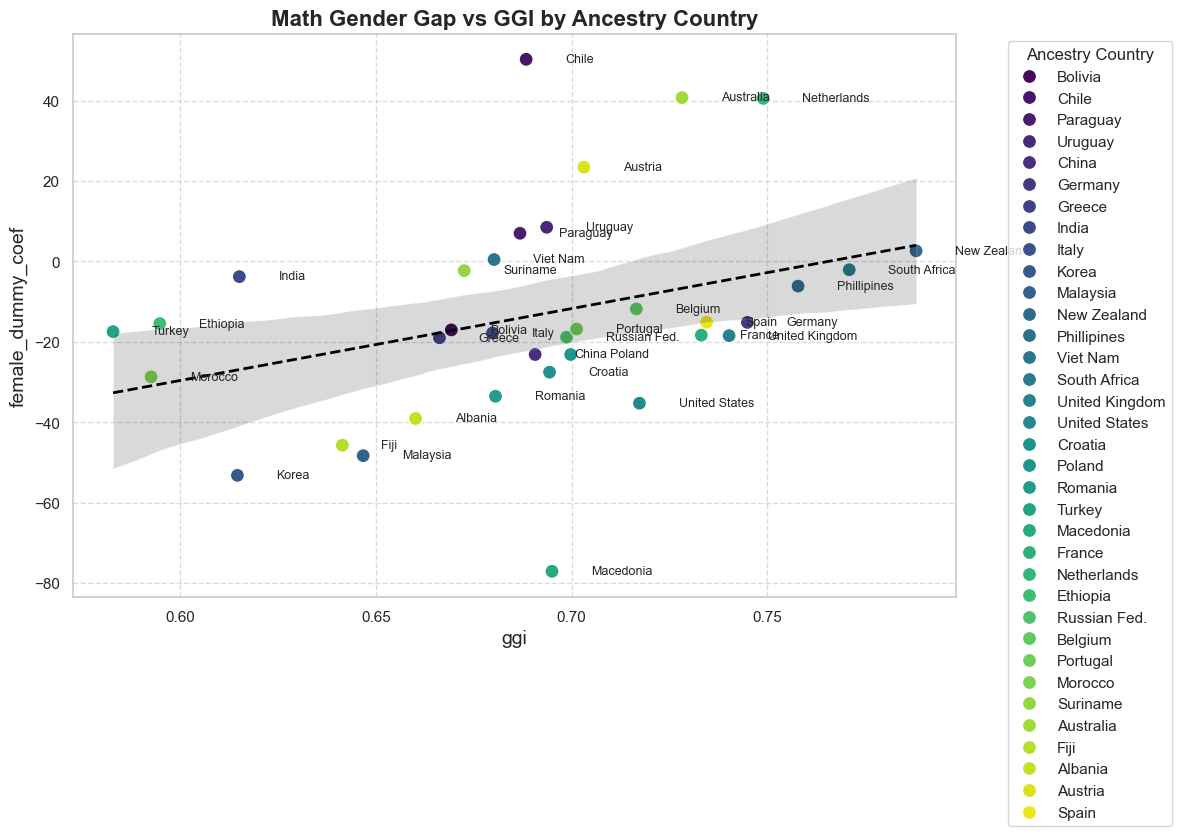

In [10]:
# Merge the data
merged_data = pd.merge(slope_estimates, df[['background', 'ggi']].drop_duplicates(), on='background')

# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", len(merged_data))

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='ggi', y='female_dummy_coef', data=merged_data, s=100, hue='background', palette=palette, edgecolor="w")

# Add labels and title with larger fonts
plt.xlabel('GGI (Gender Gap Index)', fontsize=14)
plt.ylabel('Math Gender Gap', fontsize=14)
plt.title('Math Gender Gap vs GGI by Ancestry Country', fontsize=16, fontweight='bold')

# Add annotations for each point
for i in range(len(merged_data)):
    plt.text(merged_data['ggi'].iloc[i] + 0.01, merged_data['female_dummy_coef'].iloc[i],
             merged_data['background'].iloc[i], fontsize=9, ha='left', va='center')

# Fit a linear regression model and plot the regression line
regression_model = smf.ols('female_dummy_coef ~ ggi', data=merged_data).fit()
sns.regplot(x='ggi', y='female_dummy_coef', data=merged_data, scatter=False, color='black', line_kws={"linewidth": 2, "linestyle": "--"})

# Customize gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust legend and move it outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Ancestry Country')

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
spec_1 = smf.ols('pv5math ~ female + ggi:female + age + age:female + diffgrade + diffgrade:female',
                 data=df).fit()
spec_2 = smf.ols('pv5math ~ female + ggi:female + age + age:female + diffgrade + diffgrade:female + '
                 'lgdppc:female', 
                 data=df).fit()
spec_3 = smf.ols('pv5math ~ female + ggi:female + age + age:female + diffgrade + diffgrade:female + '
                 'lgdppc:female + ggi + lgdppc', 
                 data=df).fit()
spec_4 = smf.ols('pv5math ~ female + ggi:female + age + age:female + diffgrade + diffgrade:female + '
                 'lgdppc:female + fisced + fisced:female + misced + misced:female', 
                 data=df).fit()
spec_5 = smf.ols('pv5math ~ female + ggi:female + age + age:female + diffgrade + diffgrade:female + '
                 'lgdppc:female + fisced + fisced:female + misced + misced:female + '
                 'dadwork + dadwork:female + momwork + momwork:female + homepos + homepos:female', 
                 data=df).fit()
spec_6 = smf.ols('pv5math ~ female + ggi:female + age + age:female + diffgrade + diffgrade:female + '
                 'lgdppc:female + fisced + fisced:female + misced + misced:female + '
                 'dadwork + dadwork:female + momwork + momwork:female + homepos + homepos:female + '
                 'pcgirls + pcgirls:female + private + private:female + metropolis + metropolis:female', 
                 data=df).fit()

In [13]:
stargazer = Stargazer([spec_1, spec_2, spec_3, spec_4, spec_5, spec_6])
stargazer.covariate_order([
    "female", 
    "ggi:female", 
    "age",
    "age:female",
    "diffgrade", 
    "diffgrade:female",
    "lgdppc:female", 
    "fisced",
    "fisced:female",
    "misced", 
    "misced:female",
    "dadwork", 
    "dadwork:female",
    "momwork",
    "momwork:female",
    "homepos", 
    "homepos:female",
    "pcgirls", 
    "pcgirls:female",
    "private", 
    "private:female",
    "metropolis",
    "metropolis:female",
    "ggi",
    "lgdppc"
])
display(HTML(stargazer.render_html()))